# Introduction

This is a demo of how to use the SeaGlider_utils package.

This package works best in Python 3.6 and works in 2.7 with limited plotting functionality.


**Package requirements:** 

- numpy
- pandas
- matplotlib
- netCDF4
- xarray
- tqdm
- seawater

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></div><div class="lev1 toc-item"><a href="#Working-with-a-variable" data-toc-modified-id="Working-with-a-variable-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Working with a variable</a></div><div class="lev2 toc-item"><a href="#Accessing-Data" data-toc-modified-id="Accessing-Data-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Accessing Data</a></div><div class="lev2 toc-item"><a href="#View-all-loaded-data-with-dimension" data-toc-modified-id="View-all-loaded-data-with-dimension-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>View all loaded data with <code>dimension</code></a></div><div class="lev2 toc-item"><a href="#Setting-a-column-as-a-dimension" data-toc-modified-id="Setting-a-column-as-a-dimension-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Setting a column as a dimension</a></div><div class="lev2 toc-item"><a href="#Reassigning-the-dimension-dictionary-(for-PAR)" data-toc-modified-id="Reassigning-the-dimension-dictionary-(for-PAR)-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Reassigning the dimension dictionary (for PAR)</a></div><div class="lev1 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting</a></div><div class="lev1 toc-item"><a href="#Gridding-a-variable" data-toc-modified-id="Gridding-a-variable-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gridding a variable</a></div>

In [23]:
%pylab inline

from importlib import reload
import SeaGlider_utils as sgu

rcParams['figure.dpi'] = 130

Populating the interactive namespace from numpy and matplotlib


# Import data 

The SeaGlider package takes the directory that contains all the netCDF files. The input string can also contain regular expression syntax as `glob` is used. Once the object has been imported you should be able to access all the variables that use `sg_data_point` as a dimension. This includes temperature, salinity, oxygen and a bunch of the ENG variables (press `TAB` after fullstop for autocomplete of all the variables — this will only work in *Jupyter notebook* or *IPython*)

In [24]:
# change this to the relevant directory
path_to_SG_data_dir = '/Users/luke/Documents/SeaGliders/Data/Level_0/sg543/2015_Winter/p54301[0-4]*'  

reload(sgu)
sg542 = sgu.SeaGlider(path_to_SG_data_dir)
sg542

Number of dives:  49
Date range:       2015-08-15 12:08:43   to   2015-08-26 13:08:42
Dimensions:       access these DataFrames in `.data[dim_name]`
                  • trajectory (1)
                  • gps_info (3)
                  • gc_event (23)
                  • sg_data_point (67)
                  • qsp2150_data_point (1)

Access all variables directly from this object `.variable_name`
[press TAB to autocomplete]


# Working with a variable

The data is automatically interpolated to 1000m using 1m bins. The data is loaded and interpolated dynamically when a variable is called so it might take a while the first time. 

## Accessing Data

You can also access the interpolated data using `SeaGlider_object.variable_name.data`, which returns a pandas.DataFrame, with `dims[depth, dive]`, where dives are split into up and down with whole numbers being down and `.5` being down

In [25]:
sg542.temperature.data.head(10)  # head is a pd.DataFrame function that shows the first n entries

HBox(children=(IntProgress(value=0, max=49), HTML(value='')))

,temperature,ctd_time,longitude,latitude,ctd_depth,dives
0,7.833097,2015-08-15 12:47:43.346,8.617667,-43.060967,1.512745,0.0
1,7.829159,2015-08-15 12:47:51.386,8.617687,-43.060964,1.692523,0.0
2,7.832157,2015-08-15 12:47:59.006,8.617706,-43.060962,1.796471,0.0
3,7.831517,2015-08-15 12:48:06.926,8.617726,-43.060959,2.062482,0.0
4,7.831263,2015-08-15 12:48:14.573,8.617745,-43.060957,2.086036,0.0
5,7.836698,2015-08-15 12:48:22.507,8.617749,-43.060981,2.452261,0.0
6,7.828844,2015-08-15 12:48:33.284,8.617716,-43.061000,3.872457,0.0
7,7.830206,2015-08-15 12:48:41.248,8.617703,-43.061037,5.481187,0.0
8,7.828335,2015-08-15 12:48:52.765,8.617673,-43.061105,7.674948,0.0
9,7.829207,2015-08-15 12:48:58.468,8.617646,-43.061132,8.212154,0.0


In [26]:
sg542.eng_wlbb2flvmt_Chlsig.load()

HBox(children=(IntProgress(value=0, max=49), HTML(value='')))

## View all loaded data with `dimension`

In [27]:
sg542.data['sg_data_point'].head(10)

,temperature,ctd_time,longitude,latitude,ctd_depth,dives,eng_wlbb2flvmt_Chlsig
0,7.833097,2015-08-15 12:47:43.346,8.617667,-43.060967,1.512745,0.0,94.0
1,7.829159,2015-08-15 12:47:51.386,8.617687,-43.060964,1.692523,0.0,93.0
2,7.832157,2015-08-15 12:47:59.006,8.617706,-43.060962,1.796471,0.0,94.0
3,7.831517,2015-08-15 12:48:06.926,8.617726,-43.060959,2.062482,0.0,62.0
4,7.831263,2015-08-15 12:48:14.573,8.617745,-43.060957,2.086036,0.0,95.0
5,7.836698,2015-08-15 12:48:22.507,8.617749,-43.060981,2.452261,0.0,86.0
6,7.828844,2015-08-15 12:48:33.284,8.617716,-43.061000,3.872457,0.0,93.0
7,7.830206,2015-08-15 12:48:41.248,8.617703,-43.061037,5.481187,0.0,91.0
8,7.828335,2015-08-15 12:48:52.765,8.617673,-43.061105,7.674948,0.0,92.0
9,7.829207,2015-08-15 12:48:58.468,8.617646,-43.061132,8.212154,0.0,92.0


## Setting a column as a dimension

In [28]:
sg542.data['gc_event'].coordinates = ['gc_depth']
sg542.gc_pitch_ctl.data.head(10)

HBox(children=(IntProgress(value=0, max=49), HTML(value='')))

,gc_pitch_ctl,gc_depth,dives
0,-0.54,0.0,0.0
1,-0.60,3.1,0.0
2,-0.57,13.8,0.0
3,-0.49,25.5,0.0
4,-0.49,53.3,0.0
5,-0.49,108.5,0.0
6,-0.49,126.3,0.0
7,-0.49,178.2,0.0
8,-0.49,224.6,0.0
9,-0.51,265.6,0.0


## Reassigning the dimension dictionary (for PAR)

In [29]:
sg542.ctd_pressure.load()  # load ctd_pressure as a dummy to load coordinates
sg542.eng_qsp_PARuV.__data__ = sg542.data['sg_data_point']
sg542.eng_qsp_PARuV.data.head(10)

HBox(children=(IntProgress(value=0, max=49), HTML(value='')))

HBox(children=(IntProgress(value=0, max=49), HTML(value='')))

,eng_qsp_PARuV,ctd_time,longitude,latitude,ctd_depth,dives
0,0.839,2015-08-15 12:47:43.346,8.617667,-43.060967,1.512745,0.0
1,0.437,2015-08-15 12:47:51.386,8.617687,-43.060964,1.692523,0.0
2,0.549,2015-08-15 12:47:59.006,8.617706,-43.060962,1.796471,0.0
3,0.513,2015-08-15 12:48:06.926,8.617726,-43.060959,2.062482,0.0
4,0.804,2015-08-15 12:48:14.573,8.617745,-43.060957,2.086036,0.0
5,0.736,2015-08-15 12:48:22.507,8.617749,-43.060981,2.452261,0.0
6,0.409,2015-08-15 12:48:33.284,8.617716,-43.061000,3.872457,0.0
7,0.411,2015-08-15 12:48:41.248,8.617703,-43.061037,5.481187,0.0
8,0.414,2015-08-15 12:48:52.765,8.617673,-43.061105,7.674948,0.0
9,0.356,2015-08-15 12:48:58.468,8.617646,-43.061132,8.212154,0.0


# Plotting
Simply call a variable (as below) and then plot section. `cmap` and `vlim` are optional arguments as shown in the second plot. The returned object is an axes object and all related methods can be used on these axes (as shown).

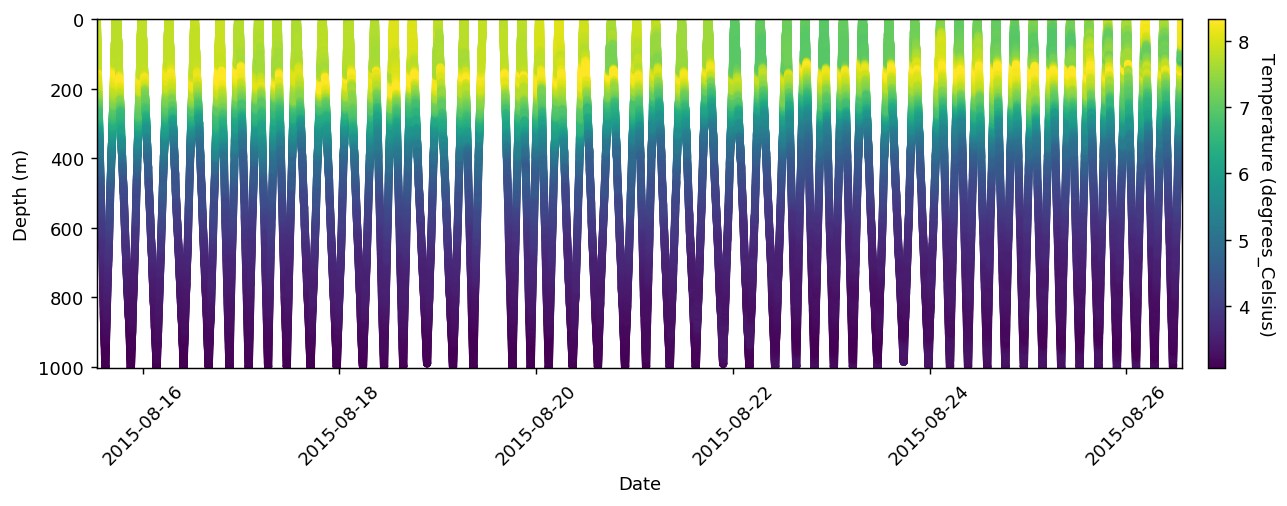

In [30]:
sg542.temperature.scatter()

HBox(children=(IntProgress(value=0, max=49), HTML(value='')))

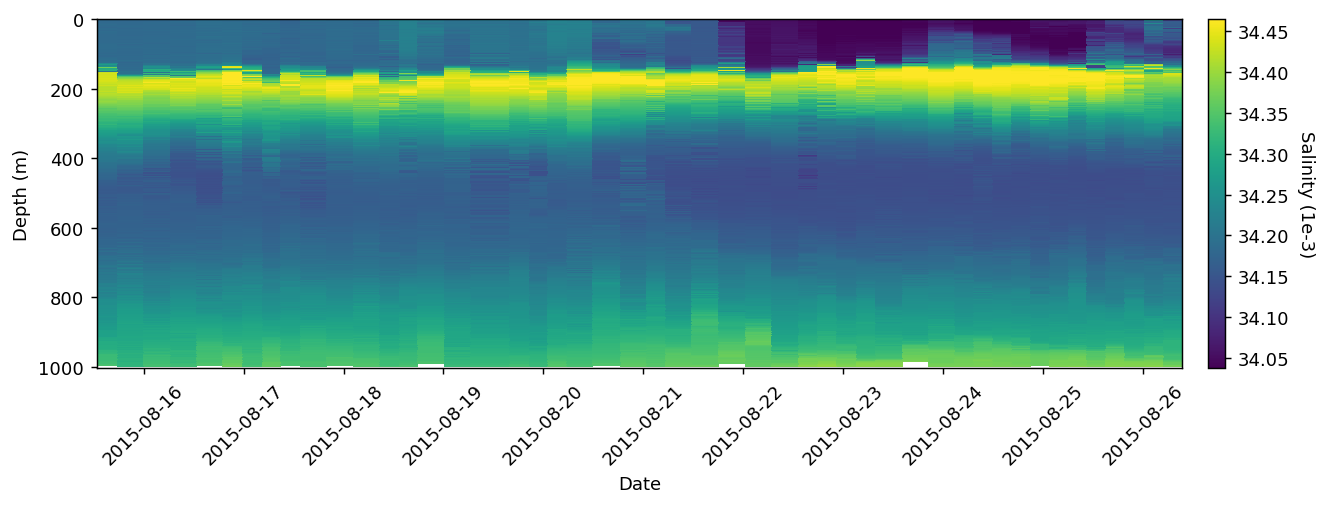

In [31]:
sg542.salinity.pcolormesh(interpolated=False)

# Gridding a variable

1. Check the resolution you should be binning at using `sgu.plotting.depth_binning`
2. Create an appropriate bins array using `np.r_[np.arange(), np.arange()]`
3. Bin the data with `sg.variable.bin_depths(bins=bins)`
4. The gridded data can be accessed from `sg.variable.gridded`

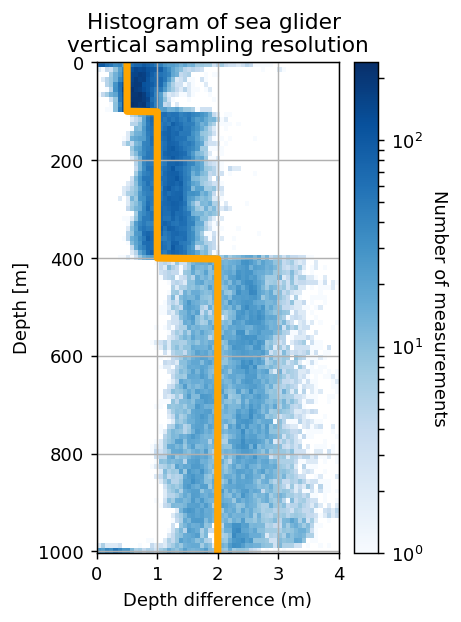

In [32]:
bins = np.r_[
    np.arange(0, 100, 0.5),
    np.arange(100, 400, 1),
    np.arange(400, 1000, 2)
]

depth = sg542.ctd_depth.data.ctd_depth
sgu.plotting.depth_binning(depth, bins=bins)

In [33]:
sg542.salinity.bin_depths(bins=bins)
sg542.salinity.gridded

ctd_time,2015-08-15 12:47:43.346000,2015-08-15 17:46:48.346000,2015-08-15 23:54:55.764000,2015-08-16 06:29:39.190000,2015-08-16 12:45:16.631000,2015-08-16 18:58:20.224000,2015-08-16 23:39:50.321000,2015-08-17 04:28:57.818000,2015-08-17 08:56:25.581000,2015-08-17 13:38:07.875000,...,2015-08-24 16:16:02.277000,2015-08-24 20:48:37.198000,2015-08-25 01:22:32.269000,2015-08-25 05:55:52.183000,2015-08-25 10:27:03.211000,2015-08-25 14:55:50.281000,2015-08-25 19:31:49.235000,2015-08-26 00:09:57.337000,2015-08-26 04:43:22.193000,2015-08-26 09:12:51.200000
ctd_depth,,,,,,,,,,,,,,,,,,,,,
0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.167583,NaN,NaN,...,NaN,34.061866,NaN,NaN,34.075159,34.146984,34.114092,34.152306,34.117920,NaN
1.75,NaN,34.184129,NaN,NaN,NaN,NaN,34.187721,34.183335,NaN,NaN,...,34.051050,NaN,34.059475,NaN,NaN,34.144234,34.114354,NaN,NaN,NaN
2.25,34.181459,NaN,NaN,34.179288,NaN,34.188313,NaN,NaN,34.170740,NaN,...,NaN,34.061876,34.059095,34.071918,34.075311,NaN,NaN,34.242374,34.120015,34.233480
2.75,34.183350,34.183859,NaN,34.183860,34.195980,NaN,NaN,34.183026,NaN,34.176978,...,34.047201,NaN,34.059478,NaN,NaN,34.143426,NaN,NaN,NaN,NaN
3.25,NaN,34.173188,34.181820,34.177152,NaN,34.189363,34.187016,34.178858,34.169358,34.187312,...,NaN,34.064570,NaN,NaN,34.076192,34.112648,34.113145,34.180566,34.180399,34.230198
3.75,34.181075,34.182738,34.184529,34.179002,34.192278,NaN,34.187507,NaN,34.167947,NaN,...,34.040260,NaN,34.059908,34.061875,34.069017,34.145234,34.146109,NaN,34.120352,34.175122
4.25,34.182058,NaN,NaN,34.183002,34.192265,NaN,NaN,34.183265,34.172033,34.187192,...,NaN,34.062630,34.059042,NaN,34.076979,NaN,NaN,34.241635,34.120301,NaN
4.75,NaN,34.174220,34.183827,NaN,34.191202,34.189556,34.186338,34.180720,34.166705,34.176824,...,34.049720,34.057892,34.059453,34.060786,34.077392,34.112257,34.130008,34.178945,34.240138,NaN
